In [6]:
%pip install pandas matplotlib seaborn wordcloud

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 29.3 MB/s  0:00:00 eta 0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl (274 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 34.6 MB/s  0:00:00
Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 36.8 MB/s  0:00:00
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [seaborn]m6/9 [matplotlib]

[notice] A new release

--- BẮT ĐẦU TEST KHUNG EDA (DATA GIẢ LẬP) ---
>> Đã khởi tạo bộ EDA Framework.

--- 1. Kiểm tra Phân bố nhãn ---


/var/folders/rb/vhvwpc0n1cd4q50b0tlt9g340000gn/T/ipykernel_43170/3260188706.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=x_val, data=df_plot, palette='viridis')


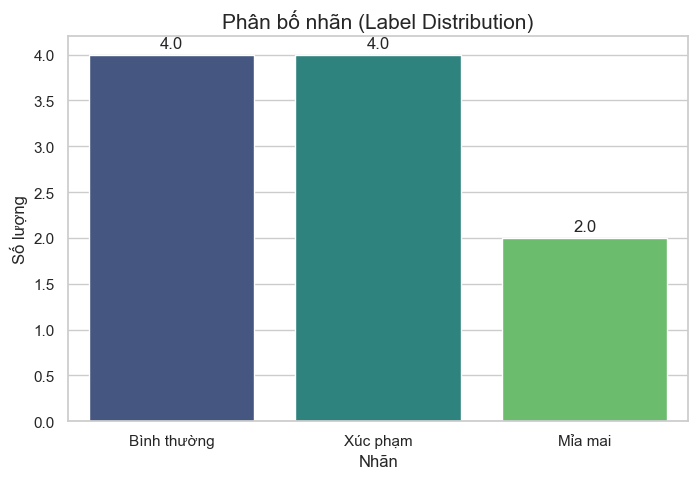

[Phần 1] Đã vẽ biểu đồ phân bố nhãn. Kiểm tra xem có bị lệch (Imbalanced) không.

--- 2. Kiểm tra Độ dài câu (Max Length) ---


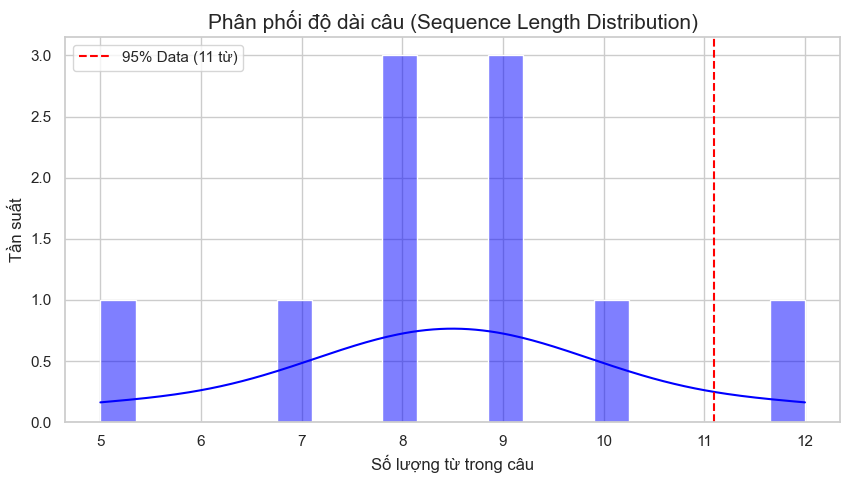

[Phần 2] Độ dài trung bình: 8.50 từ.
         Ngưỡng bao phủ 95% dữ liệu: 11 từ (Gợi ý cho Max Length).

--- 3. Kiểm tra Từ vựng & Mỉa mai (N-grams) ---


/var/folders/rb/vhvwpc0n1cd4q50b0tlt9g340000gn/T/ipykernel_43170/3260188706.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='rocket')


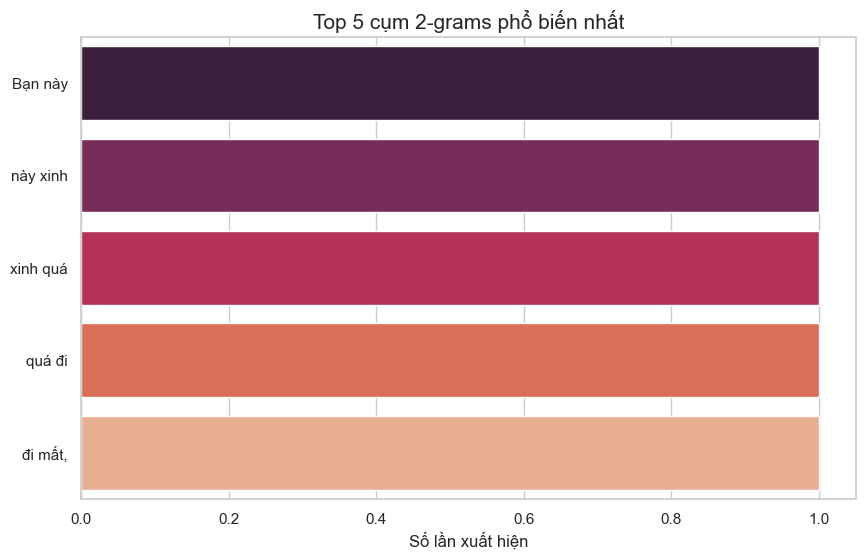

[Phần 3] Đã phân tích N-grams (n=2). Giúp phát hiện cụm từ mỉa mai.


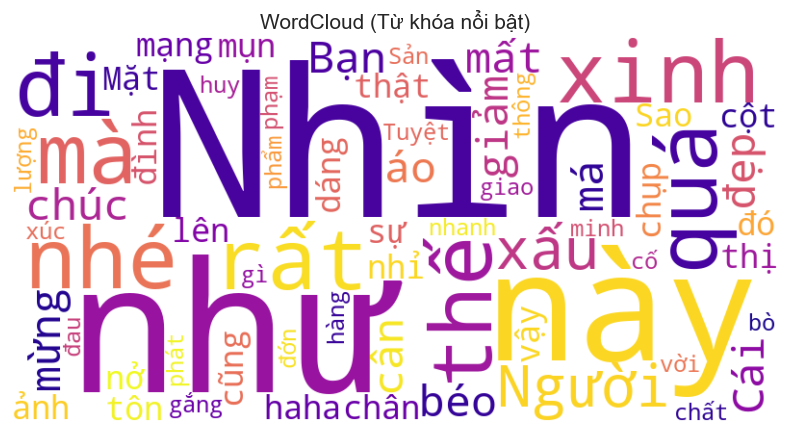


--- 4. Kiểm tra Emoji/Ký tự đặc biệt ---
[Phần 4] Phân tích Emoji & Teencode:
         - Tổng số Emoji tìm thấy: 3
         - Số bình luận chứa Emoji: 3/10
         -> Khuyến nghị: Chuyển đổi Emoji thành text (VD: 😡 -> giận dữ) thay vì xóa.

--- HOÀN THÀNH TEST KHUNG EDA ---


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

# Cấu hình giao diện
sns.set_theme(style="whitegrid")

class BodyShamingEDA:
    """
    Class quản lý toàn bộ quy trình Phân tích khám phá dữ liệu (EDA)
    cho bài toán phân loại bình luận Body Shaming.
    """
    
    def __init__(self, df):
        self.df = df
        print(">> Đã khởi tạo bộ EDA Framework.")

    # =================================================================
    # PHẦN 1: PHÂN BỐ NHÃN (LABEL DISTRIBUTION)
    # Mục tiêu: Kiểm tra mất cân bằng dữ liệu (Imbalanced Data)
    # =================================================================
    def plot_label_distribution(self, label_col='label'):
        plt.figure(figsize=(8, 5))
        # Map nhãn sang tên gọi dễ hiểu để vẽ biểu đồ
        label_map = {0: 'Bình thường', 1: 'Mỉa mai', 2: 'Xúc phạm'}
        if set(self.df[label_col].unique()).issubset(set(label_map.keys())):
            df_plot = self.df.copy()
            df_plot['label_name'] = df_plot[label_col].map(label_map)
            x_val = 'label_name'
        else:
            x_val = label_col
            
        ax = sns.countplot(x=x_val, data=df_plot, palette='viridis')
        plt.title('Phân bố nhãn (Label Distribution)', fontsize=15)
        plt.xlabel('Nhãn', fontsize=12)
        plt.ylabel('Số lượng', fontsize=12)
        
        # Hiển thị số lượng cụ thể
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=12, xytext=(0, 5), textcoords='offset points')
        plt.show()
        print(f"[Phần 1] Đã vẽ biểu đồ phân bố nhãn. Kiểm tra xem có bị lệch (Imbalanced) không.")

    # =================================================================
    # PHẦN 2: PHÂN TÍCH ĐỘ DÀI CÂU (SEQUENCE LENGTH)
    # Mục tiêu: Xác định Max Length để cắt sequence cho PhoBERT
    # =================================================================
    def analyze_sequence_length(self, text_col='text'):
        # Tính độ dài (số từ) cho mỗi câu (tách cơ bản bằng khoảng trắng)
        seq_len = self.df[text_col].apply(lambda x: len(str(x).split()))
        
        plt.figure(figsize=(10, 5))
        sns.histplot(seq_len, bins=20, kde=True, color='blue')
        plt.title('Phân phối độ dài câu (Sequence Length Distribution)', fontsize=15)
        plt.xlabel('Số lượng từ trong câu', fontsize=12)
        plt.ylabel('Tần suất', fontsize=12)
        
        # Vẽ đường percentile 95% (Ngưỡng cắt đề xuất)
        percentile_95 = seq_len.quantile(0.95)
        plt.axvline(percentile_95, color='red', linestyle='--', label=f'95% Data ({int(percentile_95)} từ)')
        plt.legend()
        plt.show()
        
        print(f"[Phần 2] Độ dài trung bình: {seq_len.mean():.2f} từ.")
        print(f"         Ngưỡng bao phủ 95% dữ liệu: {int(percentile_95)} từ (Gợi ý cho Max Length).")

    # =================================================================
    # PHẦN 3: TỪ VỰNG & N-GRAMS (VOCABULARY & BIGRAMS)
    # Mục tiêu: Tìm từ khóa đặc trưng và cụm từ mỉa mai (ví dụ: "xinh như heo")
    # =================================================================
    def visualize_ngrams(self, text_col='text', n=2, top_k=10):
        """
        Vẽ biểu đồ các cụm từ xuất hiện nhiều nhất (Bigram/Trigram)
        """
        all_words = " ".join(self.df[text_col].astype(str)).split()
        
        # Tạo N-grams (cụm n từ liên tiếp)
        ngrams = zip(*[all_words[i:] for i in range(n)])
        ngram_counts = Counter([" ".join(ngram) for ngram in ngrams])
        
        # Lấy top k
        most_common = ngram_counts.most_common(top_k)
        if not most_common:
            print("Dữ liệu quá ít để tạo N-gram.")
            return

        words, counts = zip(*most_common)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x=list(counts), y=list(words), palette='rocket')
        plt.title(f'Top {top_k} cụm {n}-grams phổ biến nhất', fontsize=15)
        plt.xlabel('Số lần xuất hiện', fontsize=12)
        plt.show()
        print(f"[Phần 3] Đã phân tích N-grams (n={n}). Giúp phát hiện cụm từ mỉa mai.")

    def generate_wordcloud(self, text_col='text'):
        text_combined = " ".join(self.df[text_col].astype(str).tolist())
        wc = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(text_combined)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title('WordCloud (Từ khóa nổi bật)', fontsize=15)
        plt.show()

    # =================================================================
    # PHẦN 4: ĐẶC TRƯNG ĐẶC BIỆT (EMOJI & TEENCODE)
    # Mục tiêu: Quan sát tần suất Emoji để quyết định giữ lại hay xóa
    # =================================================================
    def analyze_special_features(self, text_col='text'):
        # Hàm tìm emoji đơn giản bằng regex (dải unicode emoji)
        emoji_pattern = re.compile(r'[\U00010000-\U0010ffff]', flags=re.UNICODE)
        
        total_emojis = 0
        comments_with_emoji = 0
        
        for text in self.df[text_col]:
            found = emoji_pattern.findall(str(text))
            if found:
                total_emojis += len(found)
                comments_with_emoji += 1
                
        print(f"[Phần 4] Phân tích Emoji & Teencode:")
        print(f"         - Tổng số Emoji tìm thấy: {total_emojis}")
        print(f"         - Số bình luận chứa Emoji: {comments_with_emoji}/{len(self.df)}")
        print("         -> Khuyến nghị: Chuyển đổi Emoji thành text (VD: 😡 -> giận dữ) thay vì xóa.")


# ==========================================
# KHU VỰC CHẠY TEST (MAIN)
# Data giả lập đủ 3 nhãn và các trường hợp Emoji, Teencode
# ==========================================
if __name__ == "__main__":
    print("--- BẮT ĐẦU TEST KHUNG EDA (DATA GIẢ LẬP) ---")

    # 1. Tạo Data giả (10 dòng đa dạng trường hợp)
    # Label: 0: Bình thường, 1: Mỉa mai, 2: Xúc phạm
    fake_data = {
        'text': [
            "Bạn này xinh quá đi mất, chúc mừng nhé",              # 0: Bình thường
            "Nhìn béo quá, giảm cân đi má 🐷",                      # 2: Xúc phạm (có Emoji)
            "Cái áo này đẹp thật sự, rất tôn dáng",                 # 0: Bình thường
            "Mặt mụn thế mà cũng chụp ảnh up lên mạng",             # 2: Xúc phạm
            "Xinh như thị nở vậy đó haha",                          # 1: Mỉa mai (Bigram "Xinh như")
            "Sao chân to thế nhỉ, nhìn như cột đình",               # 2: Xúc phạm
            "Tuyệt vời, cố gắng phát huy nhé 👍",                   # 0: Bình thường (có Emoji)
            "Nhìn thông minh như bò",                               # 1: Mỉa mai
            "Sản phẩm rất chất lượng, giao hàng nhanh",             # 0: Bình thường
            "Người gì mà xấu đau xấu đớn, xúc phạm người nhìn 🤮"   # 2: Xúc phạm (Teencode/Emoji)
        ],
        'label': [0, 2, 0, 2, 1, 2, 0, 1, 0, 2] 
    }

    df_test = pd.DataFrame(fake_data)
    
    # Khởi tạo Class EDA
    eda_tool = BodyShamingEDA(df_test)
    
    # CHẠY CÁC CHECK-LIST THEO TÀI LIỆU
    print("\n--- 1. Kiểm tra Phân bố nhãn ---")
    eda_tool.plot_label_distribution()

    print("\n--- 2. Kiểm tra Độ dài câu (Max Length) ---")
    eda_tool.analyze_sequence_length()

    print("\n--- 3. Kiểm tra Từ vựng & Mỉa mai (N-grams) ---")
    eda_tool.visualize_ngrams(n=2, top_k=5) # Check Bigram xem có cụm "xinh như", "như bò" không
    eda_tool.generate_wordcloud()

    print("\n--- 4. Kiểm tra Emoji/Ký tự đặc biệt ---")
    eda_tool.analyze_special_features()
    
    print("\n--- HOÀN THÀNH TEST KHUNG EDA ---")